<a href="https://colab.research.google.com/github/AnkitaSavaliya/AIH/blob/main/MIMIC_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
%autosave 60

Autosaving every 60 seconds


In [122]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
# Load patients data
#d1 = files.upload()
#patients = pd.read_csv('PATIENTS.csv')
patients = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIH/MIMICIIITables/PATIENTS.csv')

In [125]:
# Load admissions data
#d2 = files.upload()
#admissions = pd.read_csv('ADMISSIONS.csv')
admissions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIH/MIMICIIITables/ADMISSIONS.csv')

In [126]:
# Load diagnoses_icd data
#d3 = files.upload()
#diagnoses = pd.read_csv('DIAGNOSES_ICD.csv')
diagnoses = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIH/MIMICIIITables/DIAGNOSES_ICD.csv')

In [127]:
# Load D_ICD_DIAGNOSES data
#d4 = files.upload()
#diagnoses_labels = pd.read_csv('D_ICD_DIAGNOSES.csv')
diagnoses_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIH/MIMICIIITables/D_ICD_DIAGNOSES.csv')

In [128]:
# Load ICUSTAYS data
#d5 = files.upload()
#icustays = pd.read_csv('ICUSTAYS.csv')
icustays = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIH/MIMICIIITables/ICUSTAYS.csv')
#icustays.head(2)

In [129]:
# Load PRESCRIPTIONS data
#d6 = files.upload()
#prescriptions = pd.read_csv('PRESCRIPTIONS.csv')
prescriptions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIH/MIMICIIITables/PRESCRIPTIONS.csv')

In [130]:
# Load PRESCRIPTIONS data
#d7 = files.upload()
#procedures = pd.read_csv('PROCEDUREEVENTS_MV.csv')
procedures = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIH/MIMICIIITables/PROCEDUREEVENTS_MV.csv')

In [131]:
# Load D_ITEMS data
#d8 = files.upload()
#d_items = pd.read_csv('D_ITEMS.csv')
d_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIH/MIMICIIITables/D_ITEMS.csv')

In [132]:
from datetime import datetime

df = patients
# Calculate age function
def calculate_age(dob, dod):
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age

# Apply calculate_age function to create "age" column
df["age"] = df.apply(lambda row: calculate_age(row["dob"], row["dod"]), axis=1)

# Filter out rows with age greater than or equal to 120
filtered_df = df[df["age"] < 120]

# Display the updated DataFrame
print(filtered_df.head(1))

   row_id  subject_id gender                  dob                  dod  \
0    9467       10006      F  2094-03-05 00:00:00  2165-08-12 00:00:00   

              dod_hosp              dod_ssn  expire_flag  age  
0  2165-08-12 00:00:00  2165-08-12 00:00:00            1   71  


In [133]:
# Merge admissions and patients data on subject_id
merged_data = pd.merge(filtered_df, admissions, on='subject_id')
merged_data.head(1)

,row_id_x,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,age,row_id_y,...,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71,12258,...,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1


In [134]:
# Merge diagnosis_icd with admissions on subject_id
merged_data_diagnosis = pd.merge(merged_data, diagnoses, on='subject_id', how='inner')
merged_data_diagnosis.head(1)

,row_id_x,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,age,row_id_y,...,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,row_id,hadm_id_y,seq_num,icd9_code
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71,12258,...,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1,112344,142345,1,99591


In [135]:
# Convert the DataFrame to a dictionary to link icd9 codes to respective labels
icd9_dict = diagnoses_labels.set_index('icd9_code')['short_title'].to_dict()

# Print the dictionary
print(icd9_dict)

{'01716': 'Erythem nod tb-oth test', '01720': 'TB periph lymph-unspec', '01721': 'TB periph lymph-no exam', '01722': 'TB periph lymph-exam unk', '01723': 'TB periph lymph-micro dx', '01724': 'TB periph lymph-cult dx', '01725': 'TB periph lymph-histo dx', '01726': 'TB periph lymph-oth test', '01730': 'TB of eye-unspec', '01731': 'TB of eye-no exam', '01732': 'TB of eye-exam unkn', '01733': 'TB of eye-micro dx', '01734': 'TB of eye-cult dx', '01735': 'TB of eye-histo dx', '01736': 'TB of eye-oth test', '01740': 'TB of ear-unspec', '01741': 'TB of ear-no exam', '01742': 'TB of ear-exam unkn', '01743': 'TB of ear-micro dx', '01744': 'TB of ear-cult dx', '01745': 'TB of ear-histo dx', '01746': 'TB of ear-oth test', '01750': 'TB of thyroid-unspec', '01751': 'TB of thyroid-no exam', '01752': 'TB of thyroid-exam unkn', '01753': 'TB of thyroid-micro dx', '01754': 'TB of thyroid-cult dx', '01755': 'TB of thyroid-histo dx', '01756': 'TB of thyroid-oth test', '01760': 'TB of adrenal-unspec', '0176

In [136]:
merged_data_diagnosis['icd9_code'].value_counts().head(5) #Top 5 diagnosed icd code


,count
icd9_code,
4019,250
42731,221
2449,202
5849,191
3572,181


### Plot-1 : Analysis of heart patients based on gender, age, and ICD-9 subtypes.

In [137]:
import plotly.express as px
import pandas as pd

# Filter for patients based on ICD-9 codes (428.x series)
diabetes_patients = merged_data_diagnosis[merged_data_diagnosis['icd9_code'].str.startswith('428')]

# Drop duplicate subject IDs to avoid double-counting patients
unique_patients = diabetes_patients.drop_duplicates(subset='subject_id')

# Create Treemap chart
treemap_data = (
    unique_patients
    .groupby(['age', 'gender'])
    .size()
    .reset_index(name='count')
)

# Add counts to the gender labels
treemap_data['gender'] = treemap_data.apply(lambda row: f"{row['gender']} ({row['count']})", axis=1)

# Create a Treemap visualization
fig1 = px.treemap(
    treemap_data,
    path=['age', 'gender'],
    values='count',
    color='count',
    color_continuous_scale='Viridis',
    hover_data={'age': True, 'gender': False, 'count': True}
)

fig1.update_layout(
    title='Treemap of Heart Patients by Age and Gender',
    title_font_size=20,
    title_x=0.5,
    margin=dict(t=50, l=25, r=25, b=25),
    coloraxis_colorbar=dict(
        title="Count"
    )
)

# Prepare icd code - short description labels
icd9_counts = unique_patients['icd9_code'].value_counts()
icd9_labels = [f"{code} - {desc}" for code, desc in zip(icd9_counts.index, icd9_counts.index.map(icd9_dict))]
icd9_data = pd.DataFrame({'ICD-9 Code': icd9_counts.index, 'Description': icd9_labels, 'Count': icd9_counts.values})

# Set pull value for slice effect
pull_values = [0.1 if i < 3 else 0 for i in range(len(icd9_data))]

# Create Pie chart using Plotly Express
fig2 = px.pie(icd9_data, names='Description', values='Count',
             title='Proportional Distribution of Heart Failure Subtypes by ICD-9 Code',
             color='Description',
             color_discrete_sequence=px.colors.sequential.Viridis)

# Adding the slice effect
fig2.update_traces(hole=0.3, pull=pull_values)
fig2.update_layout(title_x=0.5, title_font_size=20)

# Show the figures side-by-side
fig1.show()
fig2.show()


# Plot-2 : Word Cloud of the Top 50 Most Prescribed Medicines

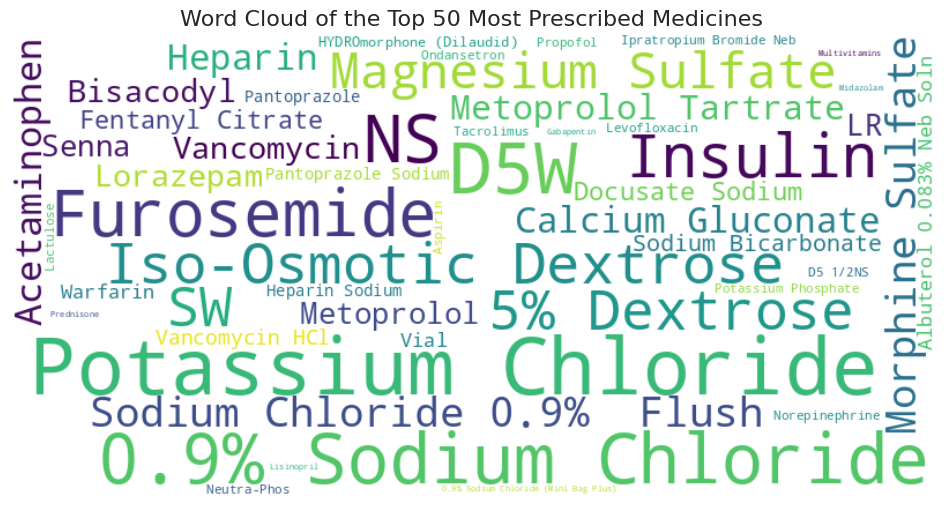

In [138]:
from wordcloud import WordCloud

# Extract the top 50 medication names and counts
medication_counts = prescriptions['drug'].value_counts(ascending=False)
top_prescribed_meds = medication_counts.head(50)
#print(medication_counts.head(5))

# Generate the word cloud using the top prescribed medications directly
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_prescribed_meds)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of the Top 50 Most Prescribed Medicines', fontsize=16)
plt.show()

In [139]:
#merged_data_diagnosis.head(2)

# Plot-3 : Average Length Of Stay by Care Unit and Year (Filtered by ICD Code)

In [140]:
import altair as alt

# Average LOS by Care Unit and Year (Can be Filtered by ICD Code)

# Convert 'intime' and 'outtime' to datetime
icustays['intime'] = pd.to_datetime(icustays['intime'])
icustays['outtime'] = pd.to_datetime(icustays['outtime'])

# Extract the year from 'intime'
icustays['intime_year'] = icustays['intime'].dt.year

# Merge icustays with ICD-9 diagnosis codes
icustays_with_icd = icustays.merge(diagnoses, on='hadm_id', how='left')

# Filter rows where ICD-9 codes start with '401' and remove duplicates
#icustays_with_icd = icustays_with_icd[icustays_with_icd['icd9_code'].str.startswith('401')].drop_duplicates(subset='hadm_id')

# Calculate the mean LOS for each care unit and year
los_stats = icustays_with_icd.groupby(['first_careunit', 'intime_year', 'icd9_code'])['los'].mean().reset_index()

# Create a list of 'ICD9 code - short description' for each unique ICD9 code
icd_label_options = [(code, f" {icd9_dict.get(code, 'Unknown description')}") for code in los_stats['icd9_code'].unique()]

# Create a selection widget for ICD-9 codes
icd_selection = alt.selection_point(
    fields=['icd9_code'],
    bind=alt.binding_select(options=icd_label_options, name="Select ICD Code ")
)

# Create the Altair chart
chart = alt.Chart(los_stats).mark_line(point=True).encode(
    x=alt.X('intime_year:O', title='Year'),
    y=alt.Y('los:Q', title='Mean Length of Stay (LOS)'),
    color=alt.Color('first_careunit:N', title='Care Unit'),
    tooltip=['first_careunit', 'intime_year', 'los', 'icd9_code']  # Add tooltips for interactivity
).add_params(
    icd_selection
).transform_filter(
    icd_selection

).properties(
    title='Average Length Of Stay by Care Unit and Year (Filtered by ICD Code)',
    width=800,
    height=400
)

# Display the chart
chart


alt.Chart(...)

# Plot-4 : Analysis of Death Counts by Diagnosis and Gender

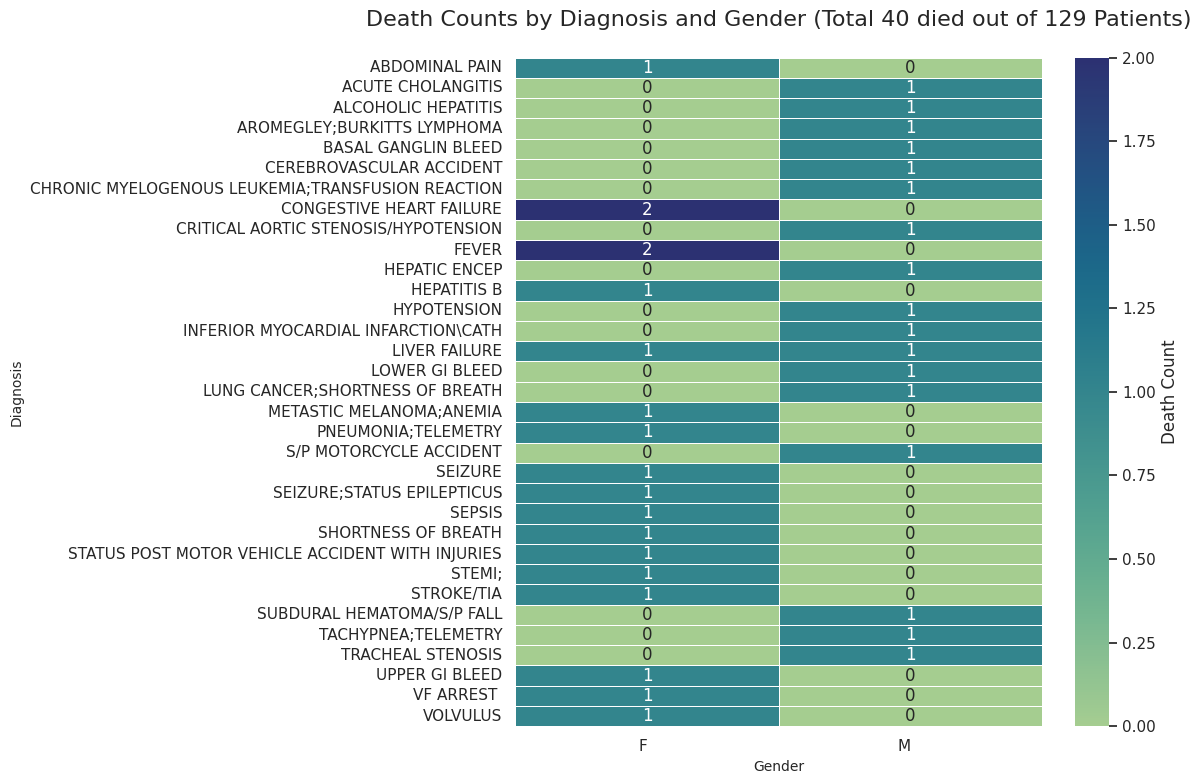

In [141]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for deceased patients
deceased = merged_data[merged_data['discharge_location'] == 'DEAD/EXPIRED']

# Calculate total patients and deceased patients
total_patients = len(admissions)
total_deceased = len(admissions[admissions['discharge_location'] == 'DEAD/EXPIRED'])

# Group deceased data by diagnosis and gender
deaths_by_diagnosis = deceased.groupby(['diagnosis', 'gender']).size().reset_index(name='death_count')
deaths_by_diagnosis = deaths_by_diagnosis.sort_values(by='death_count', ascending=False)

# Prepare heatmap data
heatmap_data = deaths_by_diagnosis.pivot_table(
    index='diagnosis',
    columns='gender',
    values='death_count',
    aggfunc='sum',
    fill_value=0
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="crest", cbar_kws={'label': 'Death Count'}, linewidths=0.5)

# Add title and labels
plt.title(f'Death Counts by Diagnosis and Gender (Total {total_deceased} died out of {total_patients} Patients)\n', fontsize=16)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Diagnosis', fontsize=10)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


# Plot-5 : Analysis of Most Performed Procedure

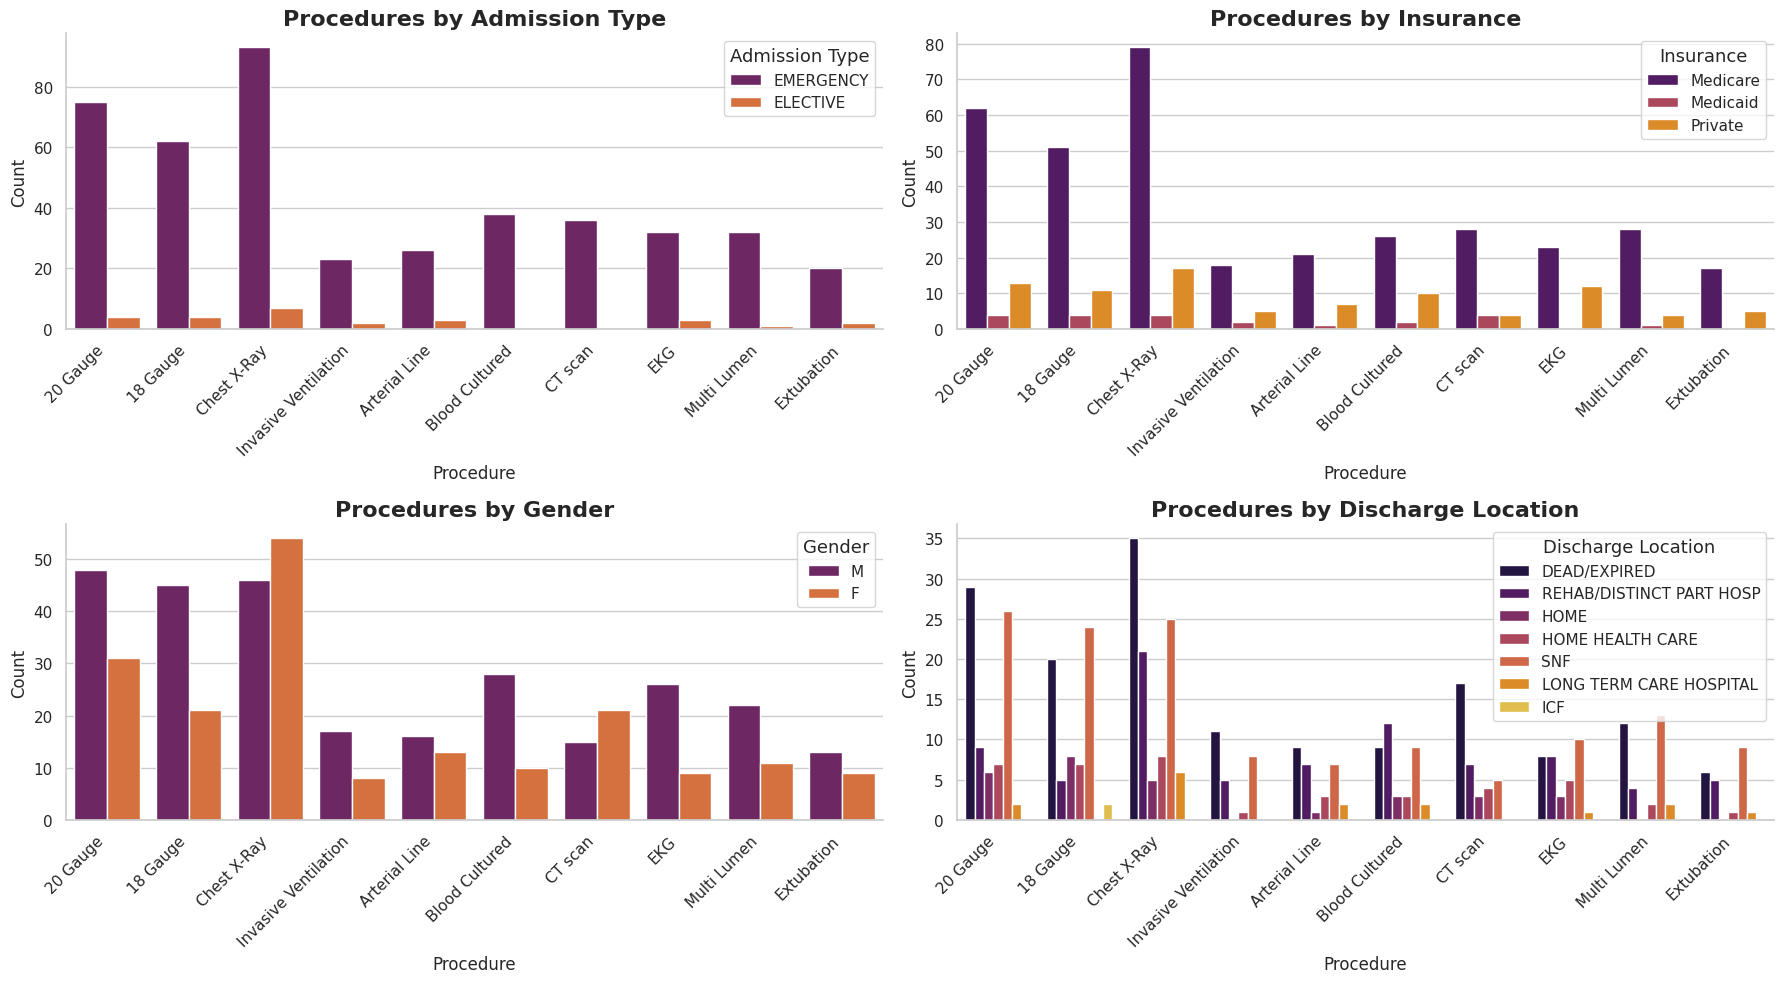

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Merge procedures with merged data and procedure labels, directly sort by 'hadm_id'
procedures_merged = (
    pd.merge(procedures, merged_data, on='hadm_id', how='inner')
    .merge(d_items[['itemid', 'label']], on='itemid', how='left')
    .sort_values(by='hadm_id')
)

# Get the top 10 most performed procedures and merge directly with labels
top_procedures_with_labels = (
    procedures_merged['itemid']
    .value_counts()
    .head(10)
    .reset_index(name='count')
    .rename(columns={'index': 'itemid'})
    .merge(d_items[['itemid', 'label']], on='itemid', how='left')
)

# Filter procedures data to include only the top 10 procedures
top_procedures_data = procedures_merged[procedures_merged['itemid'].isin(top_procedures_with_labels['itemid'])]

sns.set(style="whitegrid")
# Set up the figure for multiple subplots
plt.figure(figsize=(18, 10))

# Analysis 1: Count plot of Procedures by Admission Type
plt.subplot(2, 2, 1)
sns.countplot(data=top_procedures_data, x='label', hue='admission_type', palette='inferno')
plt.title("Procedures by Admission Type", fontsize=16, fontweight='bold')
plt.xlabel("Procedure", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Admission Type", title_fontsize='13', loc='upper right')
plt.xticks(rotation=45, ha='right')

# Analysis 2: Count plot of Procedures by Insurance
plt.subplot(2, 2, 2)
sns.countplot(data=top_procedures_data, x='label', hue='insurance', palette='inferno')
plt.title("Procedures by Insurance", fontsize=16, fontweight='bold')
plt.xlabel("Procedure", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Insurance", title_fontsize='13', loc='upper right')
plt.xticks(rotation=45, ha='right')

# Analysis 3: Count plot of Procedures by Gender
plt.subplot(2, 2, 3)
sns.countplot(data=top_procedures_data, x='label', hue='gender', palette='inferno')
plt.title("Procedures by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Procedure", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Gender", title_fontsize='13', loc='upper right')
plt.xticks(rotation=45, ha='right')

# Analysis 4: Count plot of Procedures by Discharge Location
plt.subplot(2, 2, 4)
sns.countplot(data=top_procedures_data, x='label', hue='discharge_location', palette='inferno')
plt.title("Procedures by Discharge Location", fontsize=16, fontweight='bold')
plt.xlabel("Procedure", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Discharge Location", title_fontsize='13', loc='upper right')
plt.xticks(rotation=45, ha='right')

# Remove spines for a cleaner look
sns.despine()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()